Importing dependencies

In [226]:
import tradingeconomics as te
import time
import matplotlib.pyplot as plt

Importing data

In [227]:
te.login('10D377002D63488:6E8511E3FE804EC')

elders = te.getWBIndicator(series_code = 'SP.POP.65UP.TO.ZS', output_type='df')
time.sleep(1)

covid_deaths = te.getIndicatorData(country='all', indicators = 'coronavirus deaths', output_type='df')
# covid_deaths

Treating data

In [228]:
elders = elders[['last', 'country']].rename(columns={'last': 'Elders (% of total)', 'country': 'Country'})
elders.set_index('Country', inplace=True)

covid_deaths = covid_deaths[['Country', 'LatestValue']].rename(columns={'LatestValue': 'Deaths (10.000)'}).set_index('Country')
covid_deaths['Deaths (10.000)'] = covid_deaths['Deaths (10.000)'].apply(lambda x: x/10000)

df = covid_deaths.join(elders, lsuffix='_covid_deaths', rsuffix='_elders')
# df = df[['Population in big cities (% of total)', 'Cases (millions)']]
df.dropna(inplace=True)

df.sort_values(['Deaths (10.000)', 'Elders (% of total)'], ascending=False, inplace=True)
df.drop('World', inplace=True)
df = df.head(20)
df

,Deaths (10.000),Elders (% of total)
Country,,
United States,27.0642,16.20961
Brazil,17.3817,9.25161
India,13.8122,6.37792
Mexico,10.6765,7.41666
United Kingdom,5.9051,18.50870
Italy,5.6361,23.01214
France,5.3506,20.39137
Spain,4.5069,19.64782
Argentina,3.8928,11.24311


Plotting

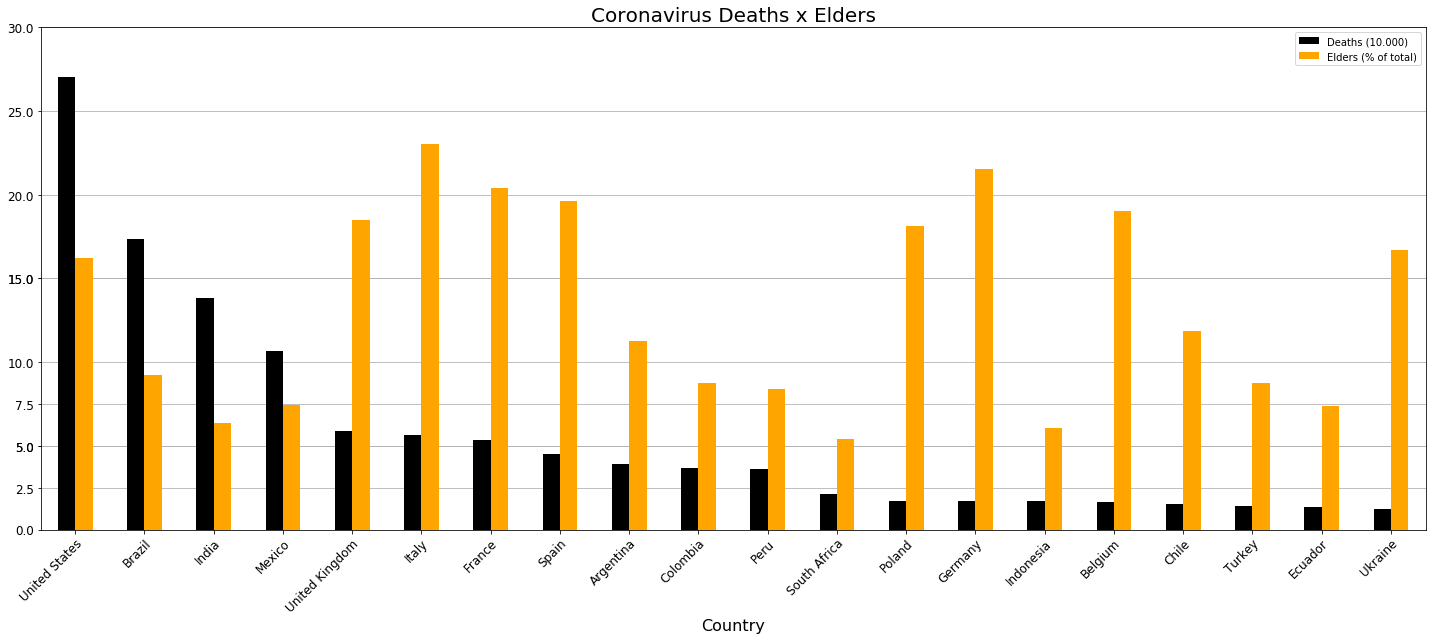

In [229]:
color_dict = {'Elders (% of total)': 'orange', 'Deaths (10.000)': 'black'}

df.plot(
    figsize=(20, 9),
    kind='bar',
    zorder=3,
    color=[color_dict.get(x, '#333333') for x in df.columns],
    fontsize=12
#     titlesize=14
)

ax = plt.gca()

plt.setp(
    ax.get_xticklabels(),
    rotation=45,
    ha='right',
    rotation_mode='anchor',
    fontsize=12
)

# ax.labelsize=40
plt.yticks(list(plt.yticks()[0]) + [2.5, 5, 7.5, 15])
ax.yaxis.grid(zorder=0)
ax.set_title('Coronavirus Deaths x Elders', color='black', size=20)
plt.xlabel('Country', fontsize=16)
plt.tight_layout()
